# Object Detection
---

#### Resources: 


## Environment Preparation

In [20]:
# Imports
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

from glob import glob

# Import path
# Place TF Models repository on the same directory (https://github.com/tensorflow/models)
sys.path.append("../../models/research/")

LABELS_PATH = "train_data/"
TEST_IMGS_PATH = "../../test_images/"

In [21]:
# Object detections imports
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## Import Models

In [22]:
# CNN Model
label_name = 'label_map.pbtxt' # From TF Models repo
NUM_CLASSES = 90

In [23]:
# load label map
label_map = label_map_util.load_labelmap(os.path.join(LABELS_PATH, label_name))
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
#print(category_index)

In [24]:
# helper functions
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [25]:
# load inference
detection_graph = tf.Graph()

with detection_graph.as_default():
    
    od_graph_def = tf.GraphDef()

    with tf.gfile.GFile("frozen_inference_graph.pb", 'rb') as fid:

        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [26]:
# load testing images
PATH_TO_TEST_IMAGES_DIR = '../../test_images/'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.png'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

../../test_images/*.png
Length of test images: 7


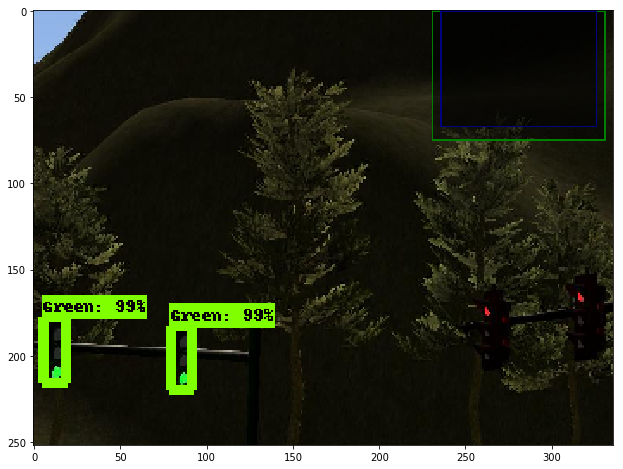

Green 0.999424
Distance (metres) 0.0
Time in milliseconds 1167.5808429718018 

Green 0.998666
Distance (metres) 0.0
Time in milliseconds 1167.5808429718018 



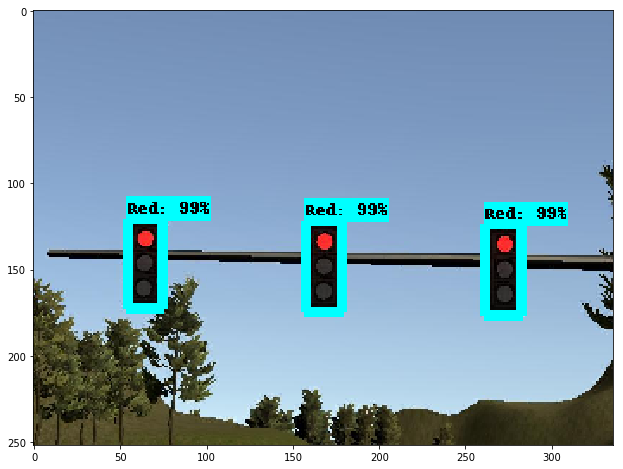

Red 0.999606
Distance (metres) 0.0
Time in milliseconds 262.2675895690918 

Red 0.999578
Distance (metres) 0.0
Time in milliseconds 262.2675895690918 

Red 0.999328
Distance (metres) 0.0
Time in milliseconds 262.2675895690918 



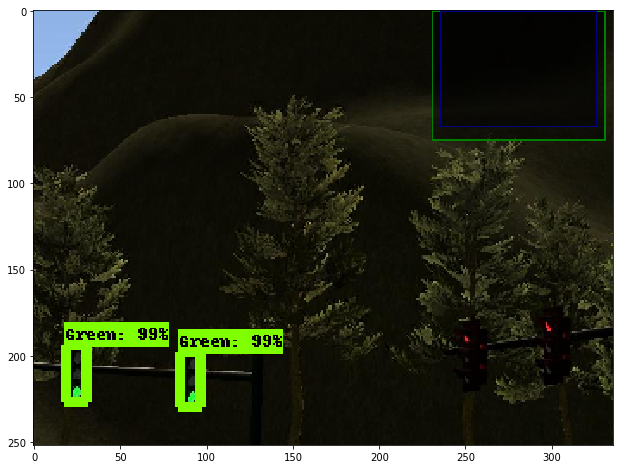

Green 0.999542
Distance (metres) 0.0
Time in milliseconds 311.3546371459961 

Green 0.99948
Distance (metres) 0.0
Time in milliseconds 311.3546371459961 



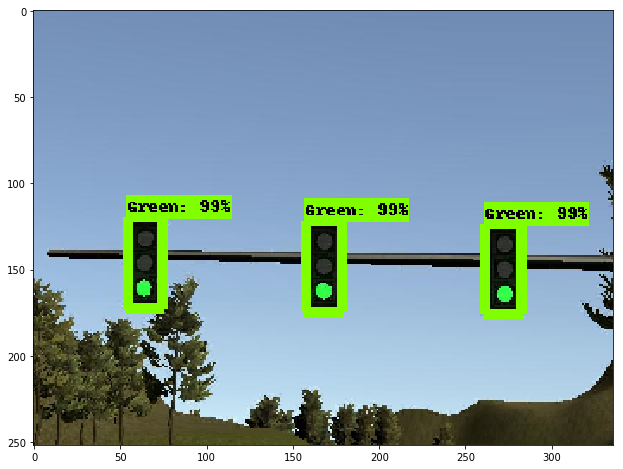

Green 0.999702
Distance (metres) 0.0
Time in milliseconds 288.0737781524658 

Green 0.999662
Distance (metres) 0.0
Time in milliseconds 288.0737781524658 

Green 0.99945
Distance (metres) 0.0
Time in milliseconds 288.0737781524658 



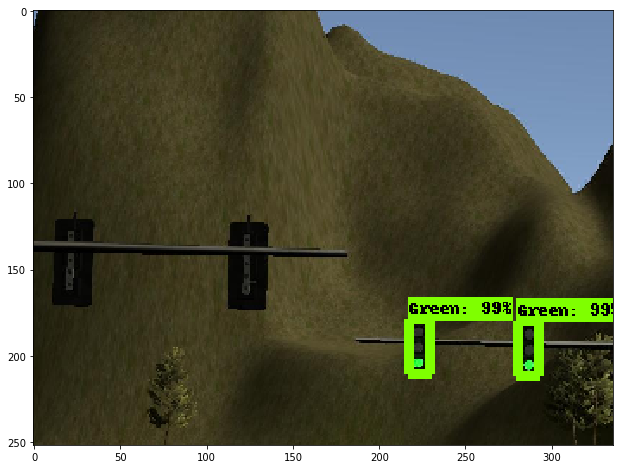

Green 0.999776
Distance (metres) 0.0
Time in milliseconds 274.43552017211914 

Green 0.999199
Distance (metres) 0.0
Time in milliseconds 274.43552017211914 



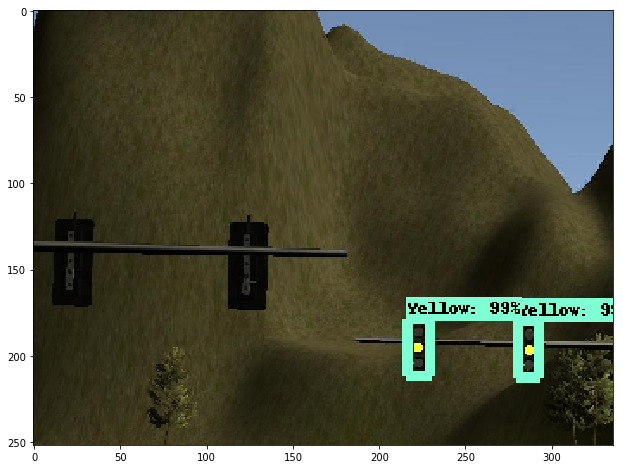

Yellow 0.999409
Distance (metres) 0.0
Time in milliseconds 280.61819076538086 

Yellow 0.998832
Distance (metres) 0.0
Time in milliseconds 280.61819076538086 



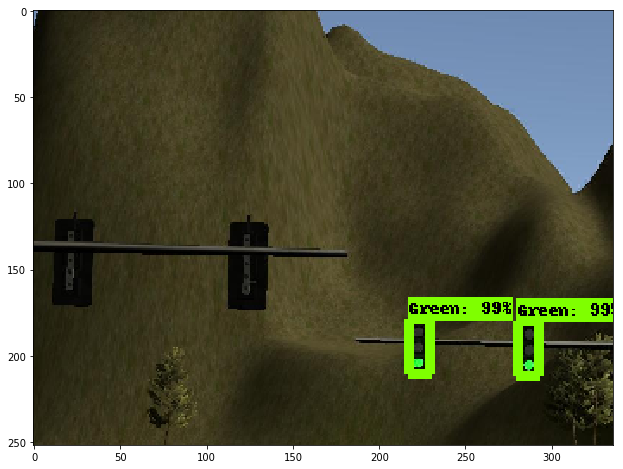

Green 0.999777
Distance (metres) 0.0
Time in milliseconds 262.8171443939209 

Green 0.999206
Distance (metres) 0.0
Time in milliseconds 262.8171443939209 



In [27]:
# Run object detection
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .80
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.97428
                    fy =  1.73205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )

                    estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                    print("Distance (metres)", estimated_distance)
                    print("Time in milliseconds", (time1 - time0) * 1000, "\n") 